# Trying out Classical Machine Learning methods to analyze the data

In this notebook. We visualize the different model performances. The models included are random forests, k-means clustering and baseline models

In [1]:
import os
import sys
import sklearn
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

opj = os.path.join

8 different preliminary data sets are imported. This .csv files contain the different punch types.

In [2]:
# Import the data.
cross = pd.read_csv("Data/Preprocessed Data/transformed_cross.csv", sep=",")
jab = pd.read_csv("Data/Preprocessed Data/transformed_jab.csv", sep=",")
lft_nopunch = pd.read_csv("Data/Preprocessed Data/transformed_lft_nopunch.csv", sep=",")
lh = pd.read_csv("Data/Preprocessed Data/transformed_lh.csv", sep=",")
lu = pd.read_csv("Data/Preprocessed Data/transformed_lu.csv", sep=",")
rght_nopunch = pd.read_csv("Data/Preprocessed Data/transformed_rght_nopunch.csv", sep=",")
rh = pd.read_csv("Data/Preprocessed Data/transformed_rh.csv", sep = ",")
ru = pd.read_csv("Data/Preprocessed Data/transformed_ru.csv", sep = ",") 

FileNotFoundError: [Errno 2] No such file or directory: 'Data/Preprocessed Data/transformed_cross.csv'

In [ ]:
dfs = [cross, jab, lft_nopunch, lh, lu, rght_nopunch, rh, ru]
df_punching = pd.concat(dfs, ignore_index = True)
print(np.shape(df_punching))

(2052, 8)


In [ ]:
mean_x = []
mean_y = []
mean_z = []
std_x = []
std_y = []
std_z = []
for df in dfs:
    mean_x.append(np.mean(df["X (m/s^2)"]))
    mean_y.append(np.mean(df["Y (m/s^2)"]))
    mean_z.append(np.mean(df["Z (m/s^2)"]))
    
    std_x.append(np.std(df["X (m/s^2)"]))
    std_y.append(np.std(df["Y (m/s^2)"]))
    std_z.append(np.std(df["Z (m/s^2)"]))

print(mean_x)
print(mean_y)
print(mean_z)

print(std_x)
print(std_y)
print(std_z)

[10.7462880794702, 9.0016059602649, 8.253933333333332, 13.399754966887418, 6.9975, 7.365608333333333, 18.569029801324504, 7.065897350993377]
[12.964622516556291, 11.265658940397351, 5.1141, 9.148586092715233, 10.104079470198675, 5.419225, 13.007394039735102, 12.761400662251654]
[5.375271523178808, 6.1075860927152315, 1.771875, 8.409072847682118, 14.624811258278143, 3.6738750000000002, 8.782211920529802, 18.992271523178808]
[2.3007999803243546, 2.098360015661925, 0.4780170626894214, 4.239533146962904, 1.5359042976661677, 0.7604847609237296, 8.320659194214375, 2.5769605086172964]
[5.558324134901821, 6.154472502794359, 0.6816157201825674, 4.227105228575339, 4.411668433205901, 0.9776028715050913, 7.044922006183568, 6.034994846977578]
[2.1084990375088686, 2.2238373487839262, 0.7223521943680473, 4.2962139170650335, 6.383054131098647, 0.7535496949162234, 5.562805724149111, 8.846297474783892]


In [ ]:
# Split the data.
X = df_punching.drop(["Punch Type"], axis=1)
y = df_punching["Punch Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [ ]:
# Train the model.
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Validate the model performance.
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=False)

print(f"Accuracy: {accuracy}")
print(f"classification_report: {report}")

Accuracy: 0.8928571428571429
classification_report:               precision    recall  f1-score   support

       cross       0.89      0.90      0.90        91
         jab       0.89      0.84      0.86        97
 lft_nopunch       1.00      1.00      1.00        40
          lh       0.93      0.88      0.90        99
          lu       0.83      0.92      0.87        75
rght_nopunch       0.82      0.94      0.88        35
          rh       0.86      0.92      0.89        83
          ru       0.93      0.85      0.89        96

    accuracy                           0.89       616
   macro avg       0.89      0.91      0.90       616
weighted avg       0.90      0.89      0.89       616



In [ ]:
baseline_model = DummyClassifier(strategy="uniform", random_state=42)
baseline_model.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='uniform')

In [ ]:
y_pred_baseline = baseline_model.predict(X_test)

In [ ]:
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
report_baseline = classification_report(y_test, y_pred_baseline)

print(f"Baseline accuracy: {accuracy_baseline}")
print(report_baseline)

Baseline accuracy: 0.1590909090909091
              precision    recall  f1-score   support

       cross       0.18      0.16      0.17        91
         jab       0.18      0.12      0.15        97
 lft_nopunch       0.05      0.10      0.07        40
          lh       0.14      0.13      0.14        99
          lu       0.16      0.13      0.15        75
rght_nopunch       0.08      0.17      0.11        35
          rh       0.21      0.19      0.20        83
          ru       0.25      0.23      0.24        96

    accuracy                           0.16       616
   macro avg       0.16      0.16      0.15       616
weighted avg       0.17      0.16      0.16       616



In [ ]:
# For some reason this is not working on my system. No idea why, function just doesn't like to be imported.
# from utils import *
# random_forest_classifier(n_estimators=1000, print_results=True)

In [ ]:
metrics_baseline = get_metrics_from_report(report_baseline, class_name="jab")

print(metrics_baseline)

(0.14, 0.1, 0.12, 0.11)


## Analyzing the experimental data

We've tested the model on the preliminary data, it showed remarkable accuracy. However, due to the way the data has been collected. We suspect that autocorrelation might have resulted in the model overfitting.

In [6]:
# Import the 50 Hz and 100 Hz data
exp_data_dir = "Data/Preprocessed Data/"

window_50_df = pd.read_csv(os.path.join(exp_data_dir, "clean_data_window50.csv"), sep=",")
window_100_df = pd.read_csv(os.path.join(exp_data_dir, 'clean_data_window100.csv'), sep=",")


## 1 Data Inspection

In [7]:
# Inspect the data
window_50_df.head

<bound method NDFrame.head of       Unnamed: 0  X (rad/s)  Y (rad/s)  Z (rad/s)  X (m/s^2)  Y (m/s^2)  \
0              0      0.940      2.556      4.737     18.410     18.712   
1              1      1.309      1.250      2.045      2.015      2.789   
2              2      0.731      0.976      1.708      4.684      4.073   
3              3      0.700      2.188      1.335      3.443      4.564   
4              4      1.202      1.424      0.666      1.988      1.778   
...          ...        ...        ...        ...        ...        ...   
7480        7480      1.028      1.465      0.951      1.852      4.492   
7481        7481      0.129      0.180      0.047      0.205      0.168   
7482        7482      1.330      1.413      1.879      4.693      3.545   
7483        7483      0.220      0.165      0.172      0.250      0.735   
7484        7484      2.858      3.637      2.594      5.015     10.997   

      Z (m/s^2)     Punch Type  
0         9.713      righthook  
1  

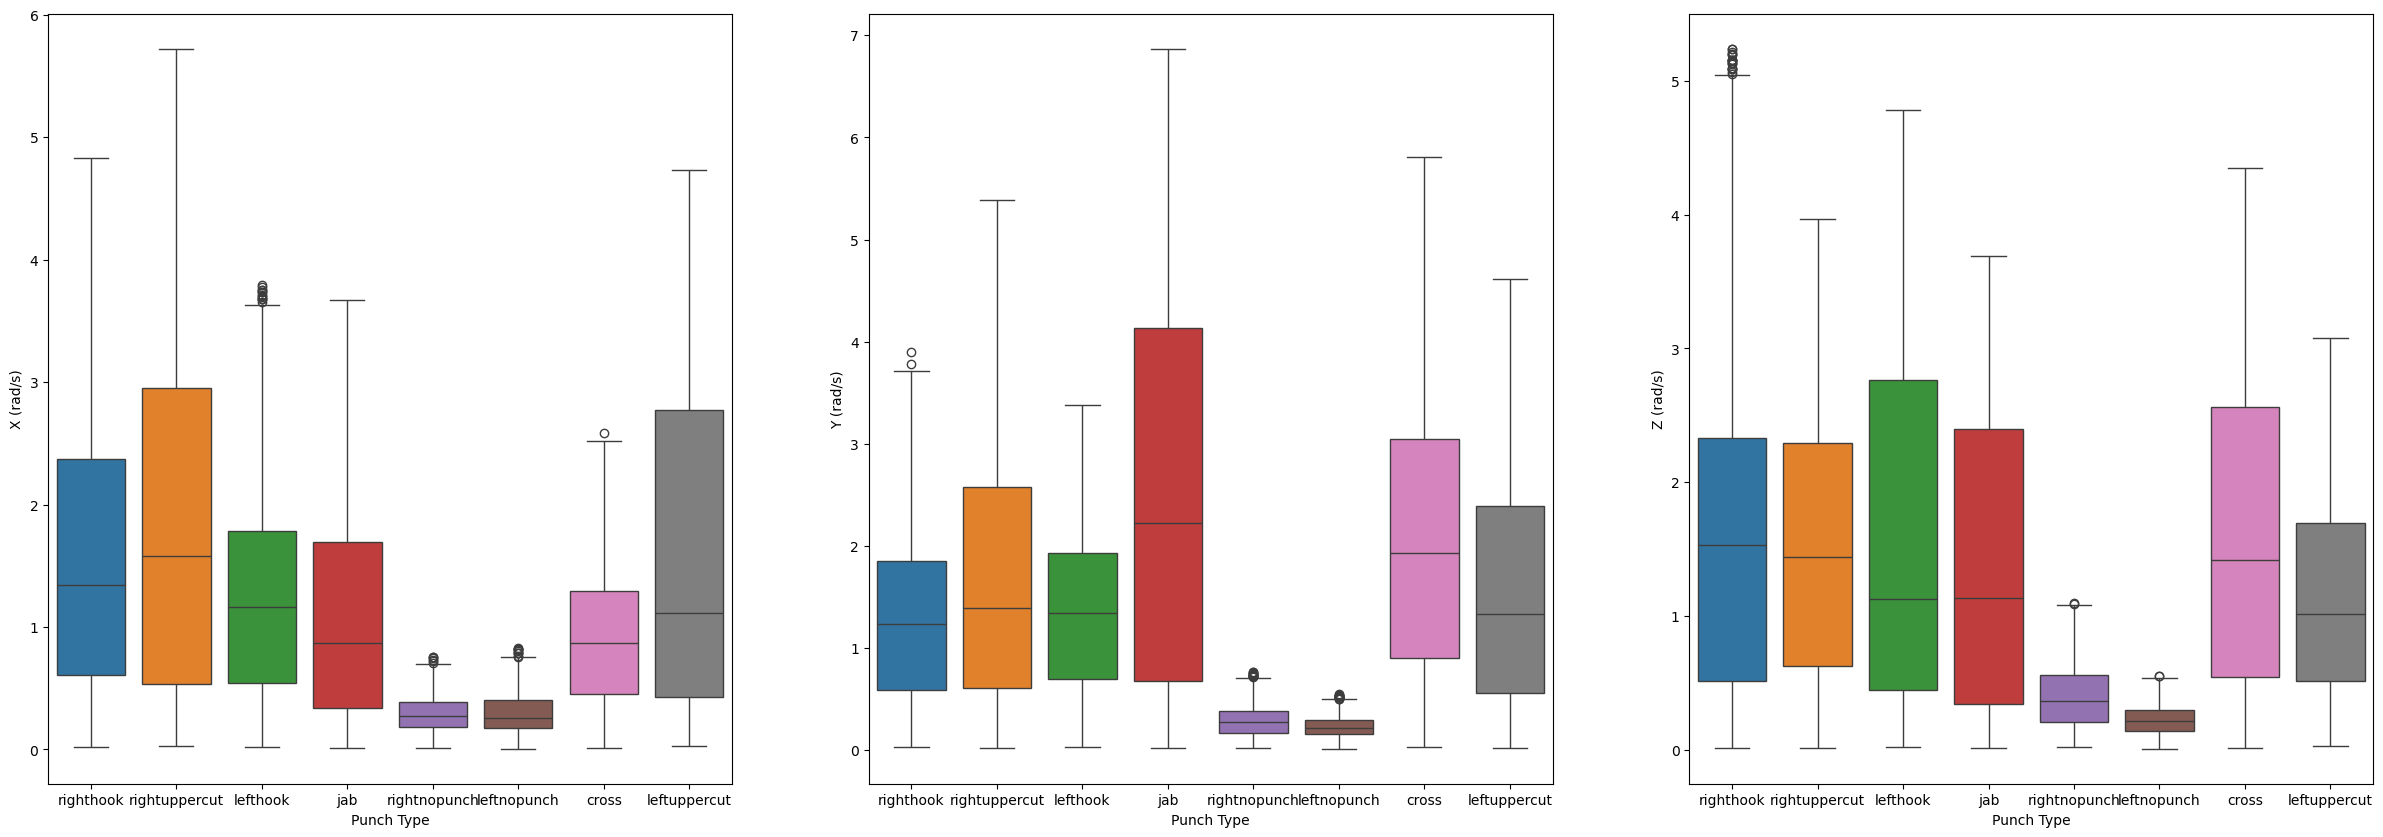

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot the distirbutions in gyroscope
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

values = ("X (rad/s)", "Y (rad/s)", "Z (rad/s)")

for ax, col in zip(axes, values):
    sns.boxplot(x=window_50_df["Punch Type"], y=window_50_df[col], hue=window_50_df["Punch Type"], ax=ax)

plt.show()

## 2 Trying out the 50 Hz window Frame

In [37]:
X = window_50_df.drop(["Punch Type"], axis=1)
y = window_50_df["Punch Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [38]:
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000, random_state=42)

In [41]:
baseline_model = DummyClassifier(strategy="uniform", random_state=42)
baseline_model.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='uniform')

In [42]:
y_pred = model.predict(X_test)
y_pred_baseline = baseline_model.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=False)

print(f"Accuracy: {accuracy}")
print(f"classification report: {report}")

accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
report_baseline = classification_report(y_test, y_pred_baseline)

print(f"Baseline accuracy: {accuracy_baseline}")
print(report_baseline)

Accuracy: 0.7030276046304541
classification report:                precision    recall  f1-score   support

        cross       0.75      0.67      0.71       332
          jab       0.71      0.74      0.72       348
     lefthook       0.68      0.65      0.66       292
  leftnopunch       0.72      0.82      0.77       229
 leftuppercut       0.62      0.68      0.65       241
    righthook       0.64      0.60      0.62       278
 rightnopunch       0.75      0.86      0.80       241
rightuppercut       0.76      0.64      0.69       285

     accuracy                           0.70      2246
    macro avg       0.70      0.71      0.70      2246
 weighted avg       0.70      0.70      0.70      2246

Baseline accuracy: 0.13134461264470168
               precision    recall  f1-score   support

        cross       0.14      0.13      0.14       332
          jab       0.14      0.11      0.12       348
     lefthook       0.13      0.12      0.12       292
  leftnopunch       0.12 

## 3 Evaluating the 100Hz Model

In [44]:
X = window_100_df.drop(["Punch Type"], axis=1)
y = window_100_df["Punch Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [45]:
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [46]:
baseline_model = DummyClassifier(strategy="uniform", random_state=42)
baseline_model.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='uniform')

In [47]:
y_pred = model.predict(X_test)
y_pred_baseline = baseline_model.predict(X_test)

In [48]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=False)

print(f"Accuracy: {accuracy}")
print(f"classification report: {report}")

accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
report_baseline = classification_report(y_test, y_pred_baseline)

print(f"Baseline accuracy: {accuracy_baseline}")
print(report_baseline)

Accuracy: 0.8426349496797805
classification report:                precision    recall  f1-score   support

        cross       0.94      0.96      0.95       153
          jab       0.94      0.95      0.95       138
     lefthook       0.86      0.78      0.82       165
  leftnopunch       0.71      0.92      0.80       114
 leftuppercut       0.76      0.73      0.75       125
    righthook       0.87      0.66      0.75       142
 rightnopunch       0.82      0.88      0.85       127
rightuppercut       0.82      0.88      0.85       129

     accuracy                           0.84      1093
    macro avg       0.84      0.84      0.84      1093
 weighted avg       0.85      0.84      0.84      1093

Baseline accuracy: 0.1262580054894785
               precision    recall  f1-score   support

        cross       0.15      0.15      0.15       153
          jab       0.16      0.14      0.15       138
     lefthook       0.12      0.09      0.10       165
  leftnopunch       0.13  

In [67]:
rf_accuracies = []
for estimators in list(range(1, 400, 20)):
    model = RandomForestClassifier(n_estimators=estimators, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=False)

    rf_accuracies.append(accuracy)
    print(f"Number of estimators: {estimators}, Accuracy: {accuracy}") 

Number of estimators: 1, Accuracy: 0.7099725526075022
Number of estimators: 21, Accuracy: 0.8151875571820677
Number of estimators: 41, Accuracy: 0.8289112534309241
Number of estimators: 61, Accuracy: 0.8261665141811528
Number of estimators: 81, Accuracy: 0.8316559926806953
Number of estimators: 101, Accuracy: 0.8325709057639524
Number of estimators: 121, Accuracy: 0.8398902104300091
Number of estimators: 141, Accuracy: 0.838975297346752
Number of estimators: 161, Accuracy: 0.8408051235132662
Number of estimators: 181, Accuracy: 0.8435498627630376
Number of estimators: 201, Accuracy: 0.8435498627630376
Number of estimators: 221, Accuracy: 0.8435498627630376
Number of estimators: 241, Accuracy: 0.8417200365965233
Number of estimators: 261, Accuracy: 0.8417200365965233
Number of estimators: 281, Accuracy: 0.8426349496797805
Number of estimators: 301, Accuracy: 0.8435498627630376
Number of estimators: 321, Accuracy: 0.8435498627630376
Number of estimators: 341, Accuracy: 0.8453796889295517

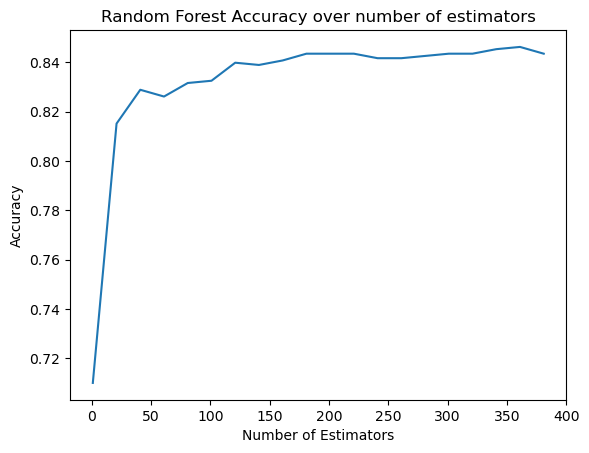

In [69]:
plt.figure()

sns.lineplot(x=list(range(1, 400, 20)), y=rf_accuracies)
plt.title("Random Forest Accuracy over number of estimators")
plt.ylabel("Accuracy")
plt.xlabel("Number of Estimators")

plt.show()

Number of estimators: 1, Accuracy: 0.2552607502287283
Number of estimators: 2, Accuracy: 0.5269899359560841
Number of estimators: 3, Accuracy: 0.6047575480329369
Number of estimators: 4, Accuracy: 0.6688014638609332
Number of estimators: 5, Accuracy: 0.7145471180237878
Number of estimators: 6, Accuracy: 0.7456541628545288
Number of estimators: 7, Accuracy: 0.7767612076852699
Number of estimators: 8, Accuracy: 0.7959743824336688
Number of estimators: 9, Accuracy: 0.818847209515096
Number of estimators: 10, Accuracy: 0.8206770356816102
Number of estimators: 11, Accuracy: 0.8307410795974383
Number of estimators: 12, Accuracy: 0.8344007319304666
Number of estimators: 13, Accuracy: 0.8353156450137237
Number of estimators: 14, Accuracy: 0.8380603842634949
Number of estimators: 15, Accuracy: 0.8499542543458372
Number of estimators: 16, Accuracy: 0.8462946020128088
Number of estimators: 17, Accuracy: 0.848124428179323
Number of estimators: 18, Accuracy: 0.8444647758462946
Number of estimators:

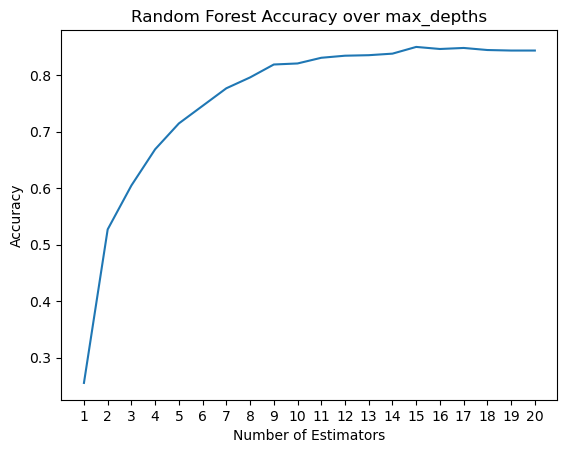

In [76]:
max_depth_list = list(range(1, 21))
rf_accuracies = []

for max_depth in max_depth_list:
    model = RandomForestClassifier(n_estimators=200, max_depth = max_depth, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=False)

    rf_accuracies.append(accuracy)
    print(f"Number of estimators: {max_depth}, Accuracy: {accuracy}") 
    
plt.figure()

sns.lineplot(x=max_depth_list, y=rf_accuracies)
plt.title("Random Forest Accuracy over max_depths")
plt.ylabel("Accuracy")
plt.xlabel("Number of Estimators")
plt.xticks(range(1,21))

plt.show()

Minimum number of samples: 2, Accuracy: 0.8499542543458372
Minimum number of samples: 3, Accuracy: 0.8426349496797805
Minimum number of samples: 4, Accuracy: 0.8398902104300091
Minimum number of samples: 5, Accuracy: 0.8371454711802379
Minimum number of samples: 6, Accuracy: 0.8380603842634949
Minimum number of samples: 7, Accuracy: 0.8325709057639524
Minimum number of samples: 8, Accuracy: 0.8325709057639524
Minimum number of samples: 9, Accuracy: 0.8316559926806953
Minimum number of samples: 10, Accuracy: 0.8353156450137237
Minimum number of samples: 11, Accuracy: 0.8325709057639524
Minimum number of samples: 12, Accuracy: 0.8344007319304666
Minimum number of samples: 13, Accuracy: 0.8316559926806953
Minimum number of samples: 14, Accuracy: 0.8289112534309241
Minimum number of samples: 15, Accuracy: 0.8252516010978957
Minimum number of samples: 16, Accuracy: 0.8252516010978957
Minimum number of samples: 17, Accuracy: 0.8215919487648673
Minimum number of samples: 18, Accuracy: 0.81793

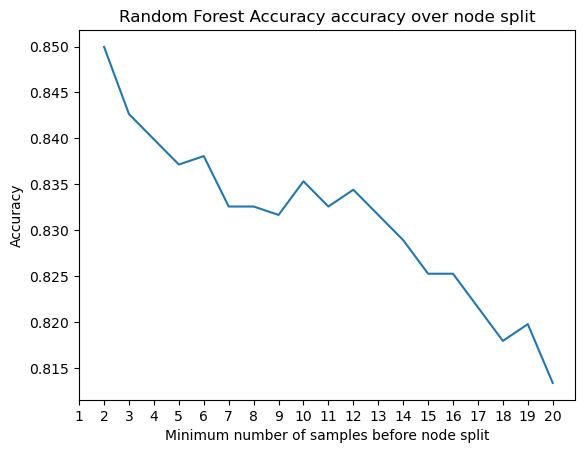

In [84]:
min_samples_split = list(range(2, 21))
rf_accuracies = []

for min_samples in min_samples_split:
    model = RandomForestClassifier(n_estimators=200, 
                                   min_samples_split=min_samples, 
                                   max_depth=15,
                                   min_samples_split=10,
                                   random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=False)

    rf_accuracies.append(accuracy)
    print(f"Minimum number of samples: {min_samples}, Accuracy: {accuracy}") 
    
plt.figure()

sns.lineplot(x=min_samples_split, y=rf_accuracies)
plt.title("Random Forest Accuracy accuracy over node split")
plt.ylabel("Accuracy")
plt.xlabel("Minimum number of samples before node split")

plt.show()

Minimum number of samples: 10, Accuracy: 0.6230558096980787
Minimum number of samples: 20, Accuracy: 0.717291857273559
Minimum number of samples: 30, Accuracy: 0.747483989021043
Minimum number of samples: 40, Accuracy: 0.7612076852698993
Minimum number of samples: 50, Accuracy: 0.7804208600182982
Minimum number of samples: 60, Accuracy: 0.7923147301006405
Minimum number of samples: 70, Accuracy: 0.7950594693504117
Minimum number of samples: 80, Accuracy: 0.7959743824336688
Minimum number of samples: 90, Accuracy: 0.8042086001829826
Minimum number of samples: 100, Accuracy: 0.8069533394327539
Minimum number of samples: 110, Accuracy: 0.8133577310155535
Minimum number of samples: 120, Accuracy: 0.8170173833485819
Minimum number of samples: 130, Accuracy: 0.8206770356816102
Minimum number of samples: 140, Accuracy: 0.8234217749313815
Minimum number of samples: 150, Accuracy: 0.8289112534309241
Minimum number of samples: 160, Accuracy: 0.8307410795974383
Minimum number of samples: 170, Acc

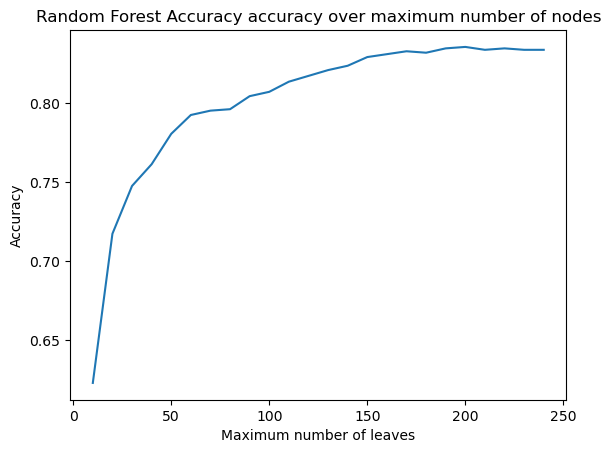

In [93]:
max_leaf_nodes = list(range(10, 250, 10))
rf_accuracies = []

for max_leaves in max_leaf_nodes:
    model = RandomForestClassifier(n_estimators=200, 
                                   max_depth=15,
                                   min_samples_split=10,
                                   max_leaf_nodes=max_leaves,
                                   random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=False)

    rf_accuracies.append(accuracy)
    print(f"Minimum number of samples: {max_leaves}, Accuracy: {accuracy}") 
    
plt.figure()

sns.lineplot(x=max_leaf_nodes, y=rf_accuracies)
plt.title("Random Forest Accuracy accuracy over maximum number of nodes")
plt.ylabel("Accuracy")
plt.xlabel("Maximum number of leaves")

plt.show()